# Homework 4: Data Visualization
- **Name**:  Xiaoyue Liu
- **UB Username**: xliu99
- **UB Person Number**:  50322257

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

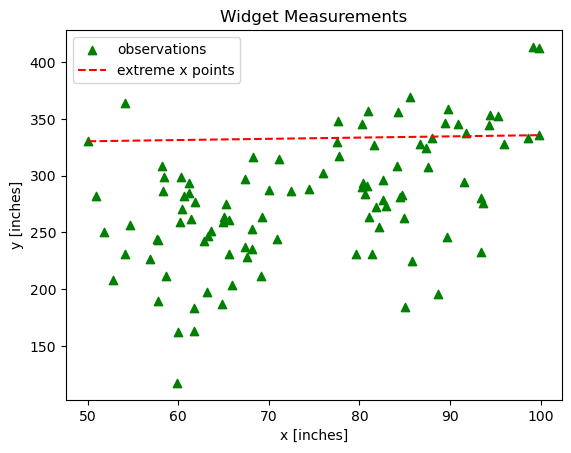

In [118]:
# Use "Code" cells to import libraries, 
# read .csv data, and 
# create your plots.
# ...


import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/Users/xioayue/Downloads/scatter_data.csv',names=['x', 'y'],comment='%')

#(b) Plot the data points as green triangles.
plt.scatter(df['x'], df['y'], color='green', marker='^', label='Measurement Points')

#(c) Plot a line from the left-most point (minimum x-value) to the right-most point (maximum
#x-value). The line should be dashed and colored red. Note: There’s really no practical
#reason for drawing such a line; this is just to practice your plotting skills.
min_x = df['x'].min()
max_x = df['x'].max()
min_y = df[df['x'] == min_x]['y'].values[0]
max_y = df[df['x'] == max_x]['y'].values[0]
plt.plot([min_x, max_x], [min_y, max_y], 'r--', label='Line from Min to Max')

#(d) Include a title for your plot.
plt.title('Widget Measurements')

#(e) Label the x- and y-axes.
plt.xlabel('x [inches]')
plt.ylabel('y [inches]')

#(f) Include a legend.
plt.legend(['observations', 'extreme x points'])

# Show the plot
plt.show()



In [ ]:
# It's OK to break up your code into multiple cells.

### Problem 2 - Histogram

In [106]:
# Use "Code" cells to import libraries, 
# read .csv data, and 
# create your plots.
# ...

import matplotlib.pyplot as plt
import pandas as pd

grades_data = pd.read_csv('/Users/xioayue/Downloads/student_grades.csv', names=['studentID', 'avgScore'],comment='%')
grades_data


,studentID,avgScore
0,0,81.563259
1,1,67.426527
2,2,86.415197
3,3,80.387361
4,4,76.669249
...,...,...
70,70,64.622963
71,71,86.951039
72,72,85.339374
73,73,69.082293


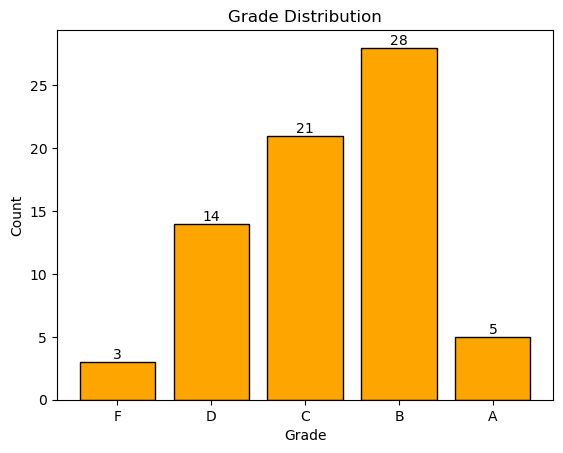

In [117]:
import matplotlib.pyplot as plt
import pandas as pd

grades_data = pd.read_csv('/Users/xioayue/Downloads/student_grades.csv', names=['studentID', 'avgScore'],comment='%')
grades_data

#(b) Create a histogram of student scores, as grouped according to the following bins:
bins = [0, 60, 70, 80, 90, 100]
labels = ['F', 'D', 'C', 'B', 'A']

#(c) Create the histogram that each bar should be colored orange, with a thin black outline
grades_data['Grade'] = pd.cut(grades_data['avgScore'], bins=bins, labels=labels, right=False)

counts = grades_data['Grade'].value_counts(sort=False)

# histogram without sorting
bars = plt.bar(counts.index, counts.values, color='orange', edgecolor='black')

# add counts above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom', ha='center')

# # customize the x-axis labels
# plt.xticks(range(len(labels)), labels)

plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Distribution')

plt.show()

In [ ]:
# It's OK to break up your code into multiple cells.

### Problem 3 - Barplot and Boxplot in the Same Figure

In [108]:
# Use "Code" cells to import libraries, 
# read .csv data, and 
# create your plots.
# ...

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

column_names = ['Problem', 'SolnMethod', 'Value']

df = pd.read_csv('/Users/xioayue/Downloads/solution_data.csv', names=column_names, comment='%', header=None)
df


,Problem,SolnMethod,Value
0,0,genetic algorithm,112.749860
1,0,simulated annealing,75.220917
2,0,tabu search,111.574225
3,0,optimal,166.170172
4,1,genetic algorithm,31.819762
5,1,simulated annealing,34.014603
6,1,tabu search,41.022612
7,1,optimal,48.634470
8,2,genetic algorithm,68.709200
9,2,simulated annealing,44.886988


In [109]:
# Calculating the optimality gap for each heuristic as a new column in the dataframe

optimal_df = df[df['SolnMethod'] == 'optimal'].copy()
df = df.merge(optimal_values, on='Problem')
df = df[df['SolnMethod'] != 'optimal'].merge(optimal_df, on='Problem', suffixes=('', '_optimal'))
df['OptimalityGap'] = (df['Value_optimal'] - df['Value']) / df['Value_optimal'] * 100
avg_optimality_gap = df.groupby('SolnMethod')['OptimalityGap'].mean().reset_index()





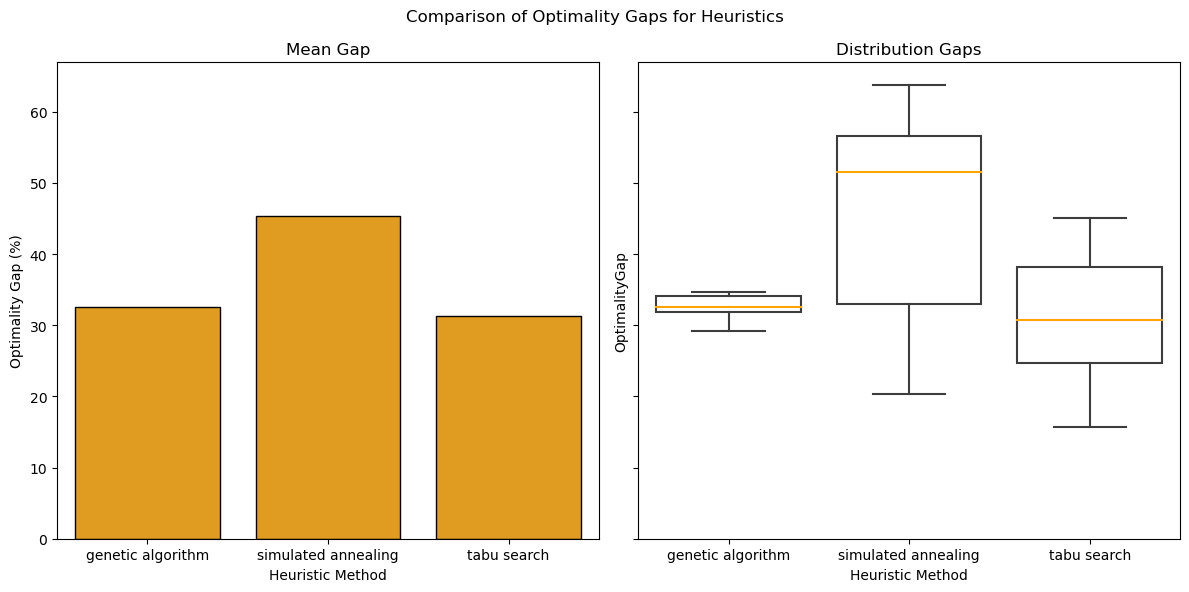

In [113]:

# Set up the matplotlib figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
fig.suptitle('Comparison of Optimality Gaps for Heuristics')

# Barplot for average optimality gap
sns.barplot(x='SolnMethod', y='OptimalityGap', data=avg_optimality_gap, ax=ax1, color='orange', edgecolor='black')
ax1.set_title('Mean Gap')
ax1.set_xlabel('Heuristic Method')
ax1.set_ylabel('Optimality Gap (%)')

# Boxplot for the spread of optimality gaps
sns.boxplot(x='SolnMethod', y='OptimalityGap', data=df, ax=ax2, medianprops=dict(color="orange"), boxprops=dict(facecolor='none'), meanprops=dict(marker='o', markerfacecolor='orange', markeredgecolor='orange'))
ax2.set_title('Distribution Gaps')
ax2.set_xlabel('Heuristic Method')

# Show the plot
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.tight_layout()
plt.show()

In [ ]:
# It's OK to break up your code into multiple cells.

--- 
## Part 2 - Explore New Plot Types

The violin plot displays the distribution of density data for retail and service alcohol outlets across different geographic categories in New York City for the years 2009 and 2021. The geographic categories include UHF42 (United Hospital Fund neighborhoods), borough level, and citywide. 
A violin plot is particularly suitable for this data because it not only shows the distribution of the densities through its width but also allows for comparison between different categories and across two different years. The 'violin' shape provides a visual representation of the number of data points at different density levels, while the inner quartile markers give a clear indication of the median and the spread of the data around it.

Filtering the Data: The DataFrame is filtered to include only the rows where the 'Time' column has the values 2009 or 2021, as we're interested in comparing these two years.
Melting the Data: The melt function is used to transform the data from a wide format to a long format. This means the separate columns for retail and service densities are collapsed into a single column with the corresponding values, and a new column is created to indicate the type of density ('Retail' or 'Service').
Renaming Density Types: The lengthy column names are replaced with simple 'Retail' and 'Service' labels for clarity in the plot.

- **URL of Example Code**:  https://seaborn.pydata.org/examples/grouped_violinplots.html
- **URL of Sample Data**:  https://a816-dohbesp.nyc.gov/IndicatorPublic/beta/data-explorer/alcohol-use/?id=2049#display=summary

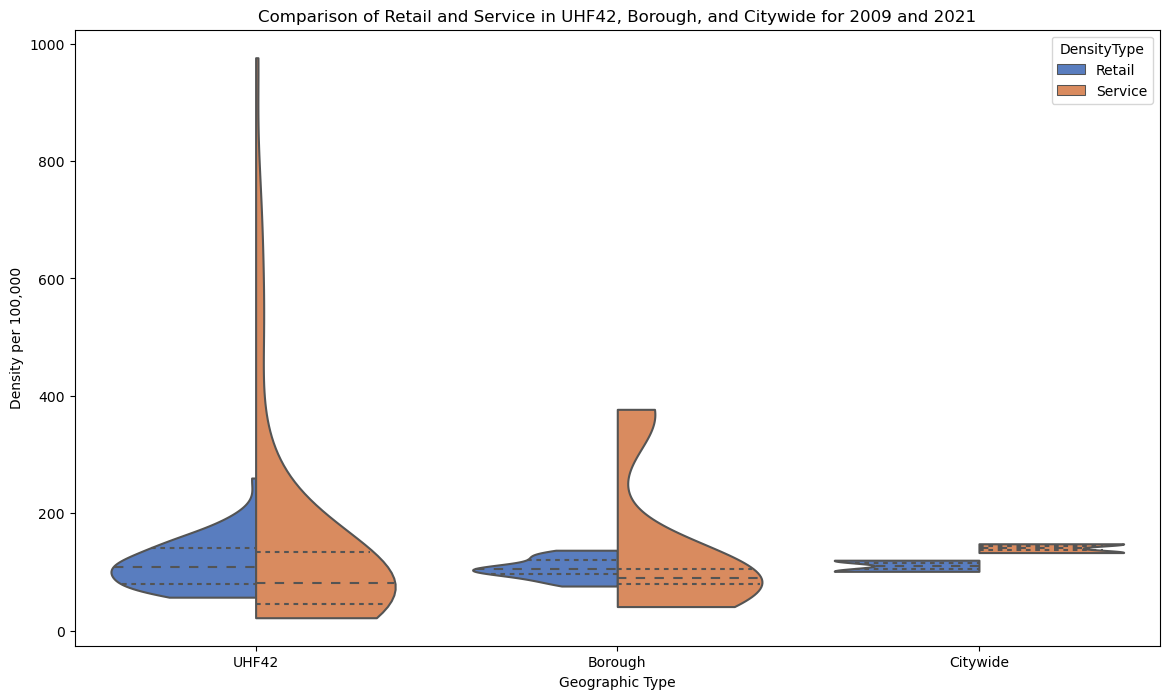

In [103]:
# Use "Code" cells to create your plots 
# ...
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = '/Users/xioayue/Downloads/NYC EH Data Portal - Alcohol access (full table).csv'
data = pd.read_csv(file_path)

# Filter the data for the years 2009 and 2021
data_filtered = data[data['Time'].isin([2009, 2021])]

# Check the unique values in 'GeoType' to ensure we have the correct categories for UHF42, Borough, and Citywide
geotype_categories = data_filtered['GeoType'].unique()
geotype_categories

# Convert density columns to numeric, replacing non-numeric entries with NaN
data_filtered['Density (retail) per 100,000'] = pd.to_numeric(data_filtered['Density (retail) per 100,000'], errors='coerce')
data_filtered['Density (service) per 100,000'] = pd.to_numeric(data_filtered['Density (service) per 100,000'], errors='coerce')

# Melting the data to long format for the densities
data_melted = pd.melt(data_filtered, id_vars=['Time', 'GeoType', 'Geography'], 
                      value_vars=['Density (retail) per 100,000', 'Density (service) per 100,000'],
                      var_name='DensityType', value_name='Density')

# Replace the long density type names with 'Retail' and 'Service'
data_melted['DensityType'] = data_melted['DensityType'].replace({'Density (retail) per 100,000': 'Retail', 
                                                                 'Density (service) per 100,000': 'Service'})

# Now let's create the violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='GeoType', y='Density', hue='DensityType', data=data_melted, split=True, inner='quartile', palette='muted', 
               scale='count', cut=0, bw=0.5)
plt.title('Comparison of Retail and Service in UHF42, Borough, and Citywide for 2009 and 2021')
plt.ylabel('Density per 100,000')
plt.xlabel('Geographic Type')

# Show the plot
plt.show()


In [3]:
# It's also OK to include comments, 
# either in Markdown or as Python code comments.

The seaborn library's violinplot function is the workhorse of the visualization. It's instructed to plot the densities (y), categorized by geographic type (x), and further distinguished by outlet type (hue).
The split parameter is set to True to show the retail and service densities side-by-side within the same violin plot, which is effective for direct comparison.
The inner parameter set to 'quartile' adds quartile lines inside the violins, providing more information about the distribution.
The scale parameter is set to 'count' to size the violins based on the number of observations, ensuring that the width of each violin is proportional to the sample size.

Changing Colors: The palette parameter in the violinplot function can be changed to another color palette, such as 'deep', 'bright', or a custom list of colors.

sns.violinplot(x='GeoType', y='Density', ..., palette='bright')


Font Sizes: You can use pyplot to customize font sizes for titles and labels.

plt.title('Your Title', fontsize=20)
plt.xlabel('Geographic Type', fontsize=14)
plt.ylabel('Density per 100,000', fontsize=14)

Scale: The scale parameter can be set to 'area' to make the area of each violin the same, which might be useful if you're more interested in the shape of the distribution rather than the number of observations.

sns.violinplot(x='GeoType', y='Density', ..., scale='area')


Bandwidth: The bw parameter affects the smoothness of the violin. A smaller bw value leads to a more detailed plot, while a larger value leads to a smoother plot.

sns.violinplot(x='GeoType', y='Density', ..., bw=0.2)  # More detailed
sns.violinplot(x='GeoType', y='Density', ..., bw=1)    # Smoother